# Rank all 18615 protein-coding genes based on ability to distinguish dysplastic from non-cancerous tissue

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

## Crunch 1 Train

1. Prepare the input data by preprocessing the spatial transcriptomics datasets (image patches (X) and gene expression (Y)).
2. Create leave-one-out cross-validation splits for training and testing.
3. Use the specified encoder model (ResNet50) and a regression method (ridge regression) to train the model
4. Save the results and the trained model in the `.resources/` directories for later inference.

![train_architecture](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/competitions/broad-1/quickstarters/resnet50-plus-ridge/images/train_architecture.png)

`Y` is log1p-normalized with scale factor 100.

All regression models and metric results are saved in `./resources/ST_pred_results` -- check it out!

Preprocessed datasets are saved in `resources/processed_dataset` (temporary storage - not needed for inference).

Official challenge metric: L2 mean error (`l2_errors_mean`)

In [2]:
data_directory_path='./data'
model_directory_path="./resources"

In [3]:
import os
from extract_spatial_positions import *
from run_training import *
from args1 import args1

/usr/lib/python3.10/importlib/__init__.py:126: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)


In [5]:
args, dir_processed_dataset, dir_models_and_results, list_ST_name_data = args1(model_directory_path)
preprocess_spatial_transcriptomics_data_train(list_ST_name_data, data_directory_path, dir_processed_dataset,
                                              args.size_subset, args.target_patch_size, args.vis_width, args.show_extracted_images)
create_cross_validation_splits(dir_processed_dataset, n_fold=args.n_fold)
run_training(args)


 -- PREPROCESS SPATIAL TRANSCRIPTOMICS DATASET --------------------------------------------


DATA (1/2): UC1_I

zarr_path ./data/UC1_I.zarr True


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


resources/processed_dataset/patches/UC1_I.h5 exists

DATA (2/2): UC9_I

zarr_path ./data/UC9_I.zarr True


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Sampling the dataset ...
resources/processed_dataset/patches/UC9_I.h5 exists

 -- CREATE CROSS-VALIDATION SPLITS --------------------------------------------

Index 0:
Train DataFrame:
  sample_id      patches_path         expr_path
1     UC1_I  patches/UC1_I.h5  adata/UC1_I.h5ad
Test DataFrame:
  sample_id      patches_path         expr_path
0     UC9_I  patches/UC9_I.h5  adata/UC9_I.h5ad
Saved train_0.csv and test_0.csv
Index 1:
Train DataFrame:
  sample_id      patches_path         expr_path
0     UC9_I  patches/UC9_I.h5  adata/UC9_I.h5ad
Test DataFrame:
  sample_id      patches_path         expr_path
1     UC1_I  patches/UC1_I.h5  adata/UC1_I.h5ad
Saved train_1.csv and test_1.csv

-- RUN TRAINING ---------------------------------------------------------------

run parameters namespace(size_subset=None, target_patch_size=32, show_extracted_images=False, vis_width=1000, seed=1, overwrite=False, dir_dataset='resources/processed_dataset', embed_dataroot='resources/processed_dataset/ST_

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.41s/it]


Loaded train split with 202534 samples: (202534, 1024)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.40s/it]


Loaded test split with 196937 samples: (196937, 1024)

--REGRESSION--

Ridge: using alpha: 0.0002122961956521739


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:994: LinAlgWarning: Ill-conditioned matrix (rcond=9.87372e-11): result may not be accurate.
  self.coef_, self.n_iter_, self.solver_ = _ridge_regression(


Model saved in './resources/ST_pred_results/split0/model.pkl'

--FOLD 0 RESULTS--

{'n_train': 202534, 'n_test': 196937, 'pearson_mean': 0.1374, 'l2_errors_mean': 0.1069, 'r2_scores_mean': -0.2735, 'l2_error_q1': 0.0165, 'l2_error_q2': 0.0596, 'l2_error_q3': 0.1451}

--FOLD 1--

train_split resources/processed_dataset/splits/train_1.csv True

--EMBEDDING--

Embedding tiles using resnet50 encoder
Load pretrained Resnet50 offline from weights path: ./resources/pytorch_model.bin

GENERATE EMBEDDING - UC9_I

Skipping embedding UC9_I.h5 as it already exists

GENERATE EMBEDDING - UC1_I

Skipping embedding UC1_I.h5 as it already exists


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.36s/it]


Loaded train split with 196937 samples: (196937, 1024)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/it]


Loaded test split with 202534 samples: (202534, 1024)

--REGRESSION--

Ridge: using alpha: 0.0002122961956521739


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:994: LinAlgWarning: Ill-conditioned matrix (rcond=3.75306e-11): result may not be accurate.
  self.coef_, self.n_iter_, self.solver_ = _ridge_regression(


Model saved in './resources/ST_pred_results/split1/model.pkl'

--FOLD 1 RESULTS--

{'n_train': 196937, 'n_test': 202534, 'pearson_mean': 0.1056, 'l2_errors_mean': 0.1059, 'r2_scores_mean': -0.1746, 'l2_error_q1': 0.016, 'l2_error_q2': 0.0488, 'l2_error_q3': 0.1385}

-- TRAINING DONE ---------------------------------------------------------------


-- Leave-one-out CV performance ---------------------------------------------------------------
{'encoder_name': 'resnet50', 'pearson_mean': 0.1215, 'pearson_std': 0.0159}


## Crunch 1 Infer

In [6]:
from infer_crunch_1 import infer_crunch_1

## Crunch 2 Infer

1. Prepare the necessary directories and load the configuration parameters from the previously trained model.
2. The test data, provided as a Zarr file, is read and specific subsets of the data (test and validation groups) are extracted.
3. Preprocess the data into image patches (X_test).
4. Generate embeddings for the test data and applies the trained models for regression predictions on the 460 measured genes.
5. Apply cosine similarities between predictions and single-cell RNA sequencing from shared genes.
6. Compute weighted average of unmeasured genes from scRNA-Seq based on similarity scores.
7. Format the predictions of the 2000 unmeasured genes for submission.

In [7]:
from infer_crunch_2 import infer_crunch_2

## Crunch 3 Infer

/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 460243/460243 [00:17<00:00, 26992.63it/s]



-- UC9_I no cancer INFERENCE ---------------------------------------------------------------


** UC9_I no cancer Predict the expression of 460 genes (Crunch 1) ****************************************************************


 -- PREPROCESS SPATIAL TRANSCRIPTOMICS DATASET --------------------------------------------

Extracting spatial positions ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 460243/460243 [03:15<00:00, 2354.20it/s]


resources/processed_dataset/patches/UC9_I no cancer.h5 does not exist
Loading imgs ...
Patching: create image dataset (X) ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 90491/90491 [01:30<00:00, 1003.06it/s]


Visualization

Preprocess dataset DONE


--UC9_I no cancer EMBEDDING--

Embedding images using resnet50 encoder
Load pretrained Resnet50 offline from weights path: ./resources/pytorch_model.bin
Generating embeddings for resources/processed_dataset/ST_data_emb/UC9_I no cancer.h5 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 707/707 [00:16<00:00, 43.26it/s]


Embedding shape (X_test): (90491, 1024)

--UC9_I no cancer REGRESSION PREDICTIONS--

Loaded model from ./resources/ST_pred_results/split1/model.pkl
Loaded model from ./resources/ST_pred_results/split0/model.pkl

 Predictions shape: (90491, 460)

-- UC9_I cancer INFERENCE ---------------------------------------------------------------


** UC9_I cancer Predict the expression of 460 genes (Crunch 1) ****************************************************************


 -- PREPROCESS SPATIAL TRANSCRIPTOMICS DATASET --------------------------------------------

Extracting spatial positions ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 460243/460243 [01:50<00:00, 4156.40it/s]


resources/processed_dataset/patches/UC9_I cancer.h5 does not exist
Loading imgs ...
Patching: create image dataset (X) ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 45712/45712 [00:43<00:00, 1042.45it/s]


Visualization

Preprocess dataset DONE


--UC9_I cancer EMBEDDING--

Embedding images using resnet50 encoder
Load pretrained Resnet50 offline from weights path: ./resources/pytorch_model.bin
Generating embeddings for resources/processed_dataset/ST_data_emb/UC9_I cancer.h5 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 358/358 [00:08<00:00, 42.71it/s]


Embedding shape (X_test): (45712, 1024)

--UC9_I cancer REGRESSION PREDICTIONS--

Loaded model from ./resources/ST_pred_results/split1/model.pkl
Loaded model from ./resources/ST_pred_results/split0/model.pkl

 Predictions shape: (45712, 460)
(memory: Total=67.35 GB, Available=47.26 GB, Used=19.10 GB, Percent=29.8%)


** UC9_I no cancer Predict the expression of 18157 unmeasured genes (Crunch 2) ****************************************************************

--COSINE SIMILARITIES between UC9_I no cancer and single-cell RNA sequencing from shared genes--

Number of shared genes between scRNA-seq and xenium data: 458
Number of unmeasured genes in Xenium data: 18157 

scRNA-Seq data shape (45482 samples x 18615 shared genes + unmeasured genes)
Xenium data shape (5000 samples x 458 shared genes)

Compute COSINE SIMILARITY: Find the top_k(=30) similar scRNA-Seq cells for each Xenium cell...

Compute WEIGHTED AVERAGE of unmeasured genes from scRNA-Seq based on similarity scores...

-- UC9_I

,mean_no_cancer,mean_cancer,variance_no_cancer,variance_cancer,dif_abs_mean,logFC,abs_logFC
COMP,0.136322,0.000000,0.035171,0.000000,0.136322,-17.056669,17.056669
S100A2,0.000000,0.070722,0.000000,0.002785,0.070722,16.109892,16.109892
ISLR,0.066956,0.000000,0.006343,0.000000,0.066956,-16.030947,16.030947
BGN,0.062976,0.000000,0.008855,0.000000,0.062976,-15.942537,15.942537
REG3A,0.000000,0.060484,0.000000,0.002409,0.060484,15.884290,15.884290
...,...,...,...,...,...,...,...
SERPINB13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SERPINB3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SERPINB4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SERTM1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


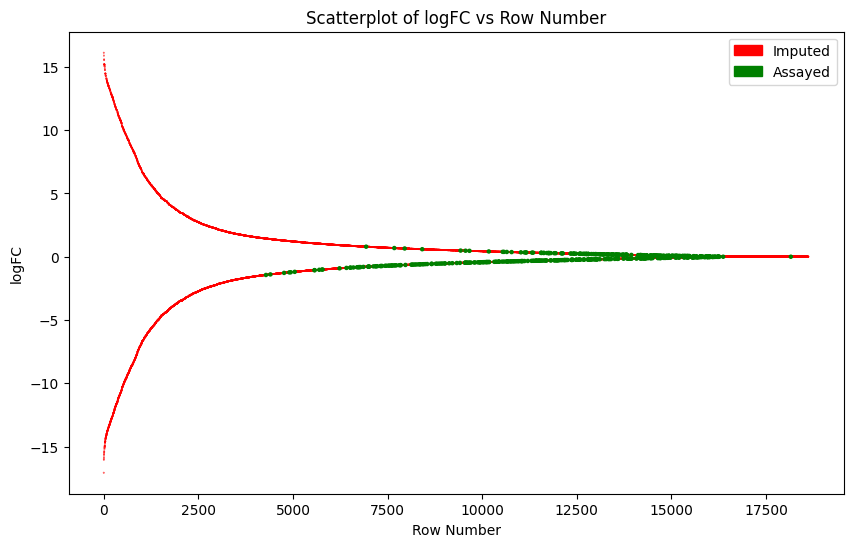

In [8]:
from types import SimpleNamespace
data_directory_path="./data"
model_directory_path="./resources"
args_dict = {
    "file_name_scRNAseq": 'Crunch3_scRNAseq.h5ad',  # Filename for scRNAseq data
    "filter_column_scRNAseq": "dysplasia",  # Column for filtering scRNAseq data
    "filter_value_no_cancer": "n",  # Filtered column value indicating absence of cancer
    "filter_value_cancer": "y",  # Filtered column value indicating the presence of cancer
    "column_for_ranking": "abs_logFC",
    "ascending": False
}

args = SimpleNamespace(**args_dict)

import spatialdata as sd 
import os
sdata = sd.read_zarr(os.path.join(data_directory_path, 'UC9_I.zarr'))
gene_460_names = list(sdata["anucleus"].var.index)

dysplasia_file = {
    # H&E image of tissue with dysplasia
    'tif_HE': os.path.join(data_directory_path, 'UC9_I-crunch3-HE.tif'),

    # Nucleus segmentation of H&E image
    'tif_HE_nuc': os.path.join(data_directory_path, 'UC9_I-crunch3-HE-label-stardist.tif'),

    # Regions in H&E image highlighting dysplasia and non-dysplasia
    'tif_region': os.path.join(data_directory_path, 'UC9_I-crunch3-HE-dysplasia-ROI.tif')
}

import skimage.io
# Read the dysplasia-related images and store them in a dictionary
dysplasia_img_list = {}
for key in dysplasia_file:
    dysplasia_img_list[key] = skimage.io.imread(dysplasia_file[key])

from skimage.measure import regionprops
regions = regionprops(dysplasia_img_list['tif_HE_nuc'])

from tqdm import tqdm
# Divide cell IDs between dysplasia and non-dysplasia status
cell_ids_no_cancer, cell_ids_cancer = [], []
# Loop through each region and extract centroid if the cell ID matches
for props in tqdm(regions):
    cell_id = props.label
    centroid = props.centroid
    y_center, x_center = int(centroid[0]), int(centroid[1])
    # Using UC9_I-crunch3-HE-dysplasia-ROI.tif, check if cell ID highlight dysplasia or non-dysplasia (or 0 indicating other tissue regions)
    dysplasia = dysplasia_img_list['tif_region'][y_center, x_center]
    if dysplasia == 1:
        cell_ids_no_cancer.append(cell_id)
    elif dysplasia == 2:
        cell_ids_cancer.append(cell_id)

prediction_cell_ids_no_cancer1 = infer_crunch_1(
    name_data="UC9_I no cancer",
    data_file_path=data_directory_path,
    model_directory_path=model_directory_path,
    sdata=dysplasia_img_list,
    cell_ids=cell_ids_no_cancer,
    gene_460_names=gene_460_names
)

prediction_cell_ids_cancer1 = infer_crunch_1(
    name_data="UC9_I cancer",
    data_file_path=data_directory_path,
    model_directory_path=model_directory_path,
    sdata=dysplasia_img_list,
    cell_ids=cell_ids_cancer,
    gene_460_names=gene_460_names
)

del regions
del dysplasia_img_list

import scanpy as sc 
scRNAseq = sc.read_h5ad(os.path.join(data_directory_path, args.file_name_scRNAseq))

# Filter scRNAseq data by dysplasia status
scRNAseq_no_cancer = scRNAseq[scRNAseq.obs[args.filter_column_scRNAseq] == args.filter_value_no_cancer].copy()
scRNAseq_cancer = scRNAseq[scRNAseq.obs[args.filter_column_scRNAseq] == args.filter_value_cancer].copy()
del scRNAseq

from print_memory_usage import print_memory_usage
import gc
gc.collect(); print_memory_usage("memory")

subsample = 5000

# No cancer status: predict the expression of 18157 genes using the expression of the 460 inferred genes and scRNAseq data (Crunch 2)
prediction_cell_ids_no_cancer2 = infer_crunch_2(
    prediction_460_genes=prediction_cell_ids_no_cancer1[0:subsample],
    name_data="UC9_I no cancer",
    data_file_path=data_directory_path,
    model_directory_path=model_directory_path,
    scRNAseq=scRNAseq_no_cancer,
    filter_column=args.filter_column_scRNAseq,
    filter_value=args.filter_value_no_cancer
)

gc.collect(); print_memory_usage("memory")

# Cancer status: predict the expression of 18157 genes using the expression of the 460 inferred genes and scRNAseq data (Crunch 2)
prediction_cell_ids_cancer2 = infer_crunch_2(
    prediction_460_genes=prediction_cell_ids_cancer1[0:subsample],
    name_data="UC9_I cancer",
    data_file_path=data_directory_path,
    model_directory_path=model_directory_path,
    scRNAseq=scRNAseq_cancer,
    filter_column=args.filter_column_scRNAseq,
    filter_value=args.filter_value_cancer
)

gc.collect(); print_memory_usage("memory")

from gene_ranking import gene_ranking

prediction, df_gene_ranking = gene_ranking(prediction_cell_ids_no_cancer2, prediction_cell_ids_cancer2,
                               column_for_ranking=args.column_for_ranking, ascending=args.ascending)

# Save the ranked genes to a CSV file -> to use for the inder function and crunchDAO crunch 3 submission
prediction.to_csv(os.path.join(model_directory_path, "gene_ranking.csv"))

import pandas as pd
import matplotlib.pyplot as plt
prediction['is460'] = prediction['Gene Name'].apply(lambda x: x in gene_460_names)
df = df_gene_ranking[['logFC']].copy()
df['is460'] = ['green' if gene in gene_460_names else 'red' for gene in df.index]
df['rank'] = [i+1 for i in range(len(df))]

# Create the scatterplot
plt.figure(figsize=(10, 6))
df_460 = df[df.is460 == 'green']
df_imputed = df[df.is460 != 'green']
plt.scatter(df_imputed['rank'].values, df_imputed['logFC'].values, c=df_imputed['is460'].values, s=0.1);
plt.scatter(df_460['rank'].values, df_460['logFC'].values, c=df_460['is460'].values, s=5);

# Add labels and title
plt.xlabel('Row Number')
plt.ylabel('logFC')
plt.title('Scatterplot of logFC vs Row Number')

# Create custom legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Imputed')
green_patch = mpatches.Patch(color='green', label='Assayed')
plt.legend(handles=[red_patch, green_patch]);

plt.savefig('resources/logFC_plot.png', dpi=300, bbox_inches='tight')